In [ ]:
# Create and store the model

import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Set paths to your dataset
base_dir = 'PetImages\\PetImages25K'
train_dir = os.path.join(base_dir, 'Train')
validation_dir = os.path.join(base_dir, 'Validate')

# Set parameters
img_height, img_width = 150, 150
batch_size = 32

# Create ImageDataGenerator for training and validation
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # 'binary' because there ar two classes (dogs and cats)
)

# Load validation data
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

# Build the CNN model
model = models.Sequential([
    layers.Input(shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=15
)

# Evaluate the model
loss, accuracy = model.evaluate(validation_generator)
print(f'Validation accuracy: {accuracy * 100:.2f}%')

# Save the model in the recommended Keras format
model.save('dog_detector_model.keras')

# Plot training & validation accuracy values if history is defined
if history is not None:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_accuracy'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy/Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Accuracy', 'Training Loss', 'Validation Accuracy', 'Validation Loss'], loc='lower center', bbox_to_anchor=(0.5, 1.15), ncol=2)
    plt.show()

In [7]:
# Load the model and use it to create predictive functions
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import matplotlib.pyplot as plt

# Load the saved model
model = tf.keras.models.load_model('dog_detector_model.keras')

# Set image size parameters for the model
img_height, img_width = 150, 150

# Function to predict a specific new image
def predict_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(img_height, img_width))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalise

    # Display the image
    plt.imshow(img_array[0])  # Display the image
    plt.axis('off')  # Hide the axis
    plt.show()  # Show the image

    # Make the prediction
    prediction = model.predict(img_array, verbose=1)
    result = 'Dog' if prediction[0][0] > 0.5 else 'Cat'
    return result

# Test new images
# result = predict_image('TestImages\\001.jpeg')
# print(result)

def predict_images_in_folder(folder_path):
    print(f'Starting prediction for images in the {folder_path} folder...\n')

    print('Files in folder:')
    print(os.listdir(folder_path))

    for filename in os.listdir(folder_path):
        if filename.lower().endswith(('.jpeg', '.jpg', '.png')) and not filename.startswith('.'):
            img_path = os.path.join(folder_path, filename)

            print(f'\nProcessing {filename}...')

            img = image.load_img(img_path, target_size=(img_height, img_width))
            img_array = image.img_to_array(img)
            img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalise

            # Display the image
            plt.imshow(img_array[0])  # Display the image
            plt.axis('off')  # Hide the axis
            plt.show()  # Show the image

            prediction = model.predict(img_array, verbose=0)
            print(f'Raw prediction output for {filename}: {prediction}')

            result = 'Dog' if prediction[0][0] > 0.5 else 'Cat'
            print(f'{filename}: {result}')

    print('\nPrediction completed.')

# Test new images in the folder
# predict_images_in_folder('TestImages')

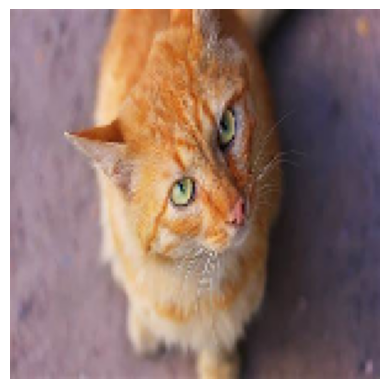

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
Cat


In [8]:
# Test specific single images
print(predict_image('TestImages\\001.jpeg'))

Starting prediction for images in the TestImages folder...

Files in folder:
['001.jpeg', '002.jpeg', '003.jpg', '004.jpg', '005.jpeg', '006.jpeg', '007.jpeg', '008.jpg', '009.jpeg', '010.jpeg']

Processing 001.jpeg...


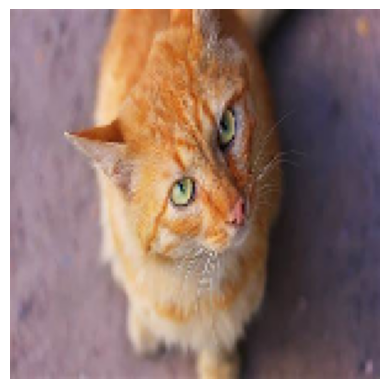

Raw prediction output for 001.jpeg: [[0.00658445]]
001.jpeg: Cat

Processing 002.jpeg...


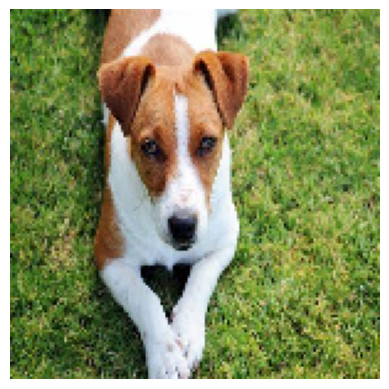

Raw prediction output for 002.jpeg: [[0.99999756]]
002.jpeg: Dog

Processing 003.jpg...


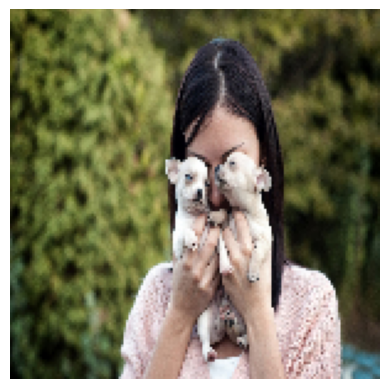

Raw prediction output for 003.jpg: [[0.99339795]]
003.jpg: Dog

Processing 004.jpg...


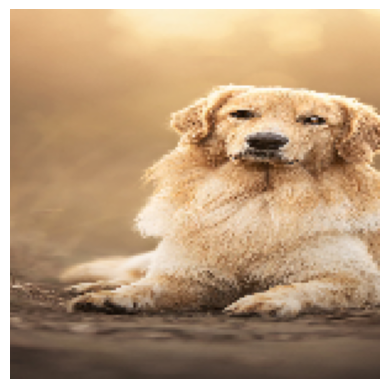

Raw prediction output for 004.jpg: [[0.9946944]]
004.jpg: Dog

Processing 005.jpeg...


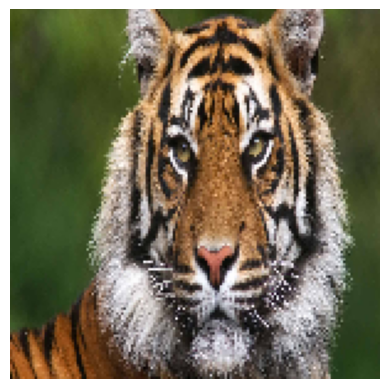

Raw prediction output for 005.jpeg: [[0.267994]]
005.jpeg: Cat

Processing 006.jpeg...


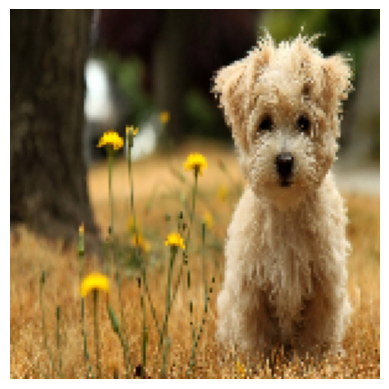

Raw prediction output for 006.jpeg: [[0.69867015]]
006.jpeg: Dog

Processing 007.jpeg...


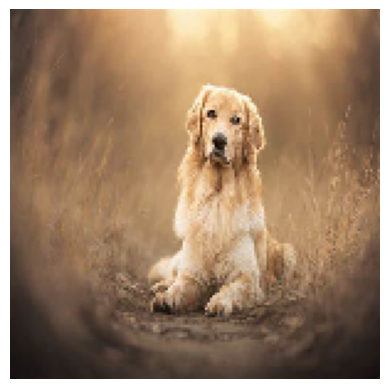

Raw prediction output for 007.jpeg: [[0.97956866]]
007.jpeg: Dog

Processing 008.jpg...


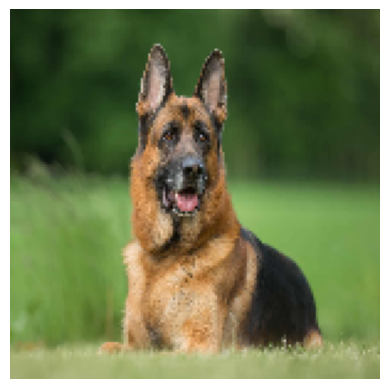

Raw prediction output for 008.jpg: [[0.98478246]]
008.jpg: Dog

Processing 009.jpeg...


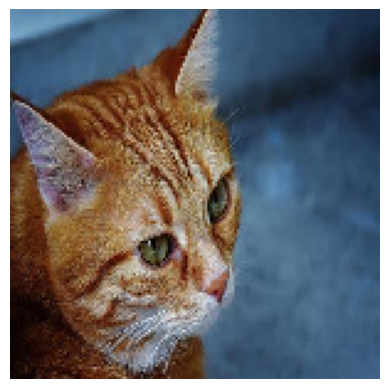

Raw prediction output for 009.jpeg: [[0.06985097]]
009.jpeg: Cat

Processing 010.jpeg...


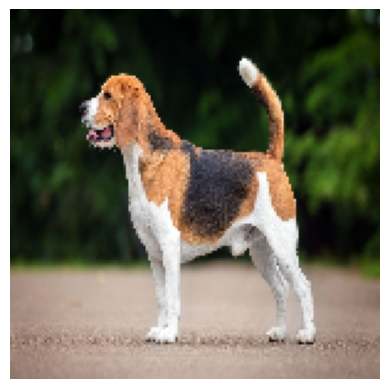

Raw prediction output for 010.jpeg: [[0.9887521]]
010.jpeg: Dog

Prediction completed.


In [6]:
# Test all images in the folder
predict_images_in_folder('TestImages')